### importing 

In [8]:
import pandas as pd 
import numpy as np
import requests
from bs4 import BeautifulSoup
url='https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
res = requests.get(url)



## Convert html to dataframe

In [10]:
soup = BeautifulSoup(res.text, 'html5lib')

table_contents=[]
table=soup.find('table')
for row in table.findAll('td'):
    cell = {}
    if row.span.text=='Not assigned':
        pass
    else:
        cell['PostalCode'] = row.p.text[:3]
        cell['Borough'] = (row.span.text).split('(')[0]
        cell['Neighborhood'] = (((((row.span.text).split('(')[1]).strip(')')).replace(' /',',')).replace(')',' ')).strip(' ')
        table_contents.append(cell)

# print(table_contents)
df=pd.DataFrame(table_contents)
df['Borough']=df['Borough'].replace({'Downtown TorontoStn A PO Boxes25 The Esplanade':'Downtown Toronto Stn A',
                                             'East TorontoBusiness reply mail Processing Centre969 Eastern':'East Toronto Business',
                                             'EtobicokeNorthwest':'Etobicoke Northwest','East YorkEast Toronto':'East York/East Toronto',
                                             'MississaugaCanada Post Gateway Processing Centre':'Mississauga'})


## GET 12 rows

In [11]:
df.head(12)

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government
5,M9A,Etobicoke,Islington Avenue
6,M1B,Scarborough,"Malvern, Rouge"
7,M3B,North York,Don Mills North
8,M4B,East York,"Parkview Hill, Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"


In [12]:
 print (df['Borough'].value_counts())

North York                24
Downtown Toronto          17
Scarborough               17
Etobicoke                 11
Central Toronto            9
West Toronto               6
York                       5
East York                  4
East Toronto               4
Queen's Park               1
East York/East Toronto     1
Mississauga                1
Downtown Toronto Stn A     1
Etobicoke Northwest        1
East Toronto Business      1
Name: Borough, dtype: int64


## check null

In [13]:
df.isnull().sum()

PostalCode      0
Borough         0
Neighborhood    0
dtype: int64

## size

In [14]:
df.shape

(103, 3)

## read 2nd csv and rename 1st dataframe

In [15]:
pc=pd.read_csv('Geospatial_Coordinates.csv')
pc.head()
df.rename(columns={"PostalCode": "Postal Code"},inplace=True)


## merge two dataframes

In [16]:
postal_code = df.merge(pc, on='Postal Code')

In [17]:
postal_code.head(12)

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494
5,M9A,Etobicoke,Islington Avenue,43.667856,-79.532242
6,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
7,M3B,North York,Don Mills North,43.745906,-79.352188
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937


In [30]:
# instantiate a feature group for the incidents in the dataframe
import folium
incidents = folium.map.FeatureGroup()


for lat, lng, in zip(postal_code.Latitude, postal_code.Longitude):
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

In [29]:

latitude = 43.753259
longitude = -79.329656
# create map and display it
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=10)


sanfran_map
sanfran_map.add_child(incidents)

In [33]:
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs
%matplotlib inline


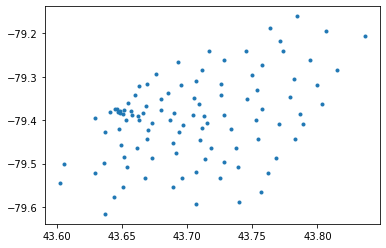

In [92]:
 a=plt.scatter(postal_code['Latitude'], postal_code['Longitude'], marker='.')

In [93]:
kmeans = KMeans(n_clusters=3)

y = kmeans.fit_predict(postal_code[['Latitude','Longitude']])

postal_code['Cluster'] = y

postal_code.head()


,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster
0,M3A,North York,Parkwoods,43.753259,-79.329656,0
1,M4A,North York,Victoria Village,43.725882,-79.315572,0
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,2
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,1
4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494,2


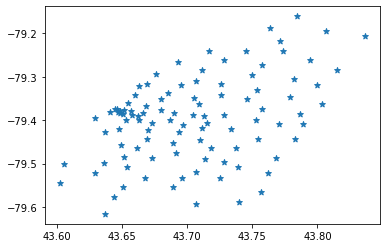

In [94]:
 a=plt.scatter(postal_code['Latitude'], postal_code['Longitude'] , marker="*" )

In [95]:
kmeans_labels = kmeans.labels_
kmeans_labels
kmeans_cluster_centers = kmeans.cluster_centers_
kmeans_cluster_centers

array([[ 43.7595681 , -79.26924577],
       [ 43.6871642 , -79.51689392],
       [ 43.68974056, -79.3867485 ]])

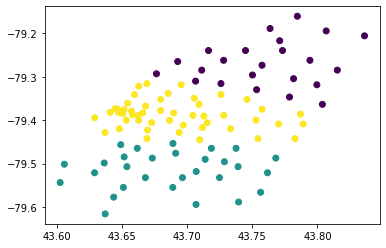

In [99]:
plt.scatter(postal_code['Latitude'], postal_code['Longitude'], c=kmeans_labels.astype(float))